In [1]:
# import all essential libraries
import os
import re
#Essentails
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import string
import random

from sklearn.metrics import confusion_matrix

# for measuring the accuracy
from sklearn.metrics import classification_report


from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.metrics import classification_report, accuracy_score

# visualizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer




from skimpy import skim
from summarytools import dfSummary

import warnings
warnings.filterwarnings("ignore")
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [2]:
 df = pd.read_csv("C:/Users/mohan/OneDrive/Desktop/DMWAssign/bbc_news.csv")
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


## we are doing sentiment analysis on news of ukrain

In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
df.tail() # Last 5 rows

,title,pubDate,guid,link,description
42110,Highlights: Wales make history in Dublin,"Tue, 03 Dec 2024 23:07:27 GMT",https://www.bbc.com/sport/football/videos/ckg1...,https://www.bbc.com/sport/football/videos/ckg1...,Watch highlights as Wales win 2-1 in Dublin fo...
42111,Gang jailed over £200m of cocaine in banana boxes,"Tue, 03 Dec 2024 17:48:54 GMT",https://www.bbc.com/news/articles/c3e8pvg284no#9,https://www.bbc.com/news/articles/c3e8pvg284no,More than two tonnes of the Class A drug was s...
42112,Scottish Budget presents huge challenges for SNP,"Tue, 03 Dec 2024 23:00:17 GMT",https://www.bbc.com/news/articles/ckg1m1j2grpo#9,https://www.bbc.com/news/articles/ckg1m1j2grpo,Finance Secretary Shona Robison is preparing t...
42113,Celebrations as Wales make history qualifying ...,"Wed, 04 Dec 2024 00:05:52 GMT",https://www.bbc.com/news/articles/c791nq8nl73o#9,https://www.bbc.com/news/articles/c791nq8nl73o,Wales defeated the Republic of Ireland 2-1 mak...
42114,School tells Muslim girls it’s ‘not safe’ for ...,"Wed, 04 Dec 2024 00:03:58 GMT",https://www.bbc.com/news/articles/cx2wk0k4597o#9,https://www.bbc.com/news/articles/cx2wk0k4597o,Three children have not been back to the Belfa...


## we are doing sentiment analysis on news of ukrain

In [5]:
df.info

<bound method DataFrame.info of                                                    title  \
0      Ukraine: Angry Zelensky vows to punish Russian...   
1      War in Ukraine: Taking cover in a town under a...   
2             Ukraine war 'catastrophic for global food'   
3      Manchester Arena bombing: Saffie Roussos's par...   
4      Ukraine conflict: Oil price soars to highest l...   
...                                                  ...   
42110           Highlights: Wales make history in Dublin   
42111  Gang jailed over £200m of cocaine in banana boxes   
42112   Scottish Budget presents huge challenges for SNP   
42113  Celebrations as Wales make history qualifying ...   
42114  School tells Muslim girls it’s ‘not safe’ for ...   

                             pubDate  \
0      Mon, 07 Mar 2022 08:01:56 GMT   
1      Sun, 06 Mar 2022 22:49:58 GMT   
2      Mon, 07 Mar 2022 00:14:42 GMT   
3      Mon, 07 Mar 2022 00:05:40 GMT   
4      Mon, 07 Mar 2022 08:15:53 GMT   
...    

In [6]:
# convert pubDate' to datetime

df['pubDate'] = pd.to_datetime(df['pubDate'], errors='coerce')


In [7]:
#Check if there is any null values in data
df.isnull().sum()

title          0
pubDate        0
guid           0
link           0
description    0
dtype: int64

In [8]:
df.describe()

,pubDate
count,42115
mean,2023-07-30 13:07:27.158850560
min,2013-08-30 01:01:55
25%,2022-11-17 19:35:30
50%,2023-08-21 05:33:25
75%,2024-04-03 17:10:04
max,2024-12-04 00:05:52


In [9]:
#Check if there is ant duplicated data
# Check for duplicates across all columns
duplicated = df.duplicated()

# Print the number of duplicated instances
print("Number of duplicated instances:", duplicated.sum())

# Print the duplicated instances
df[duplicated]

Number of duplicated instances: 0


,title,pubDate,guid,link,description


In [10]:
#Perform frequency analysis on the words used in title and description to identify common themes or keywords.

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    all_stopwords = set(stopwords.words('english'))  # Load stopwords
    all_stopwords.remove('not')  # Remove 'not' from stopwords
    wordcloud = WordCloud(stopwords=all_stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="Black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

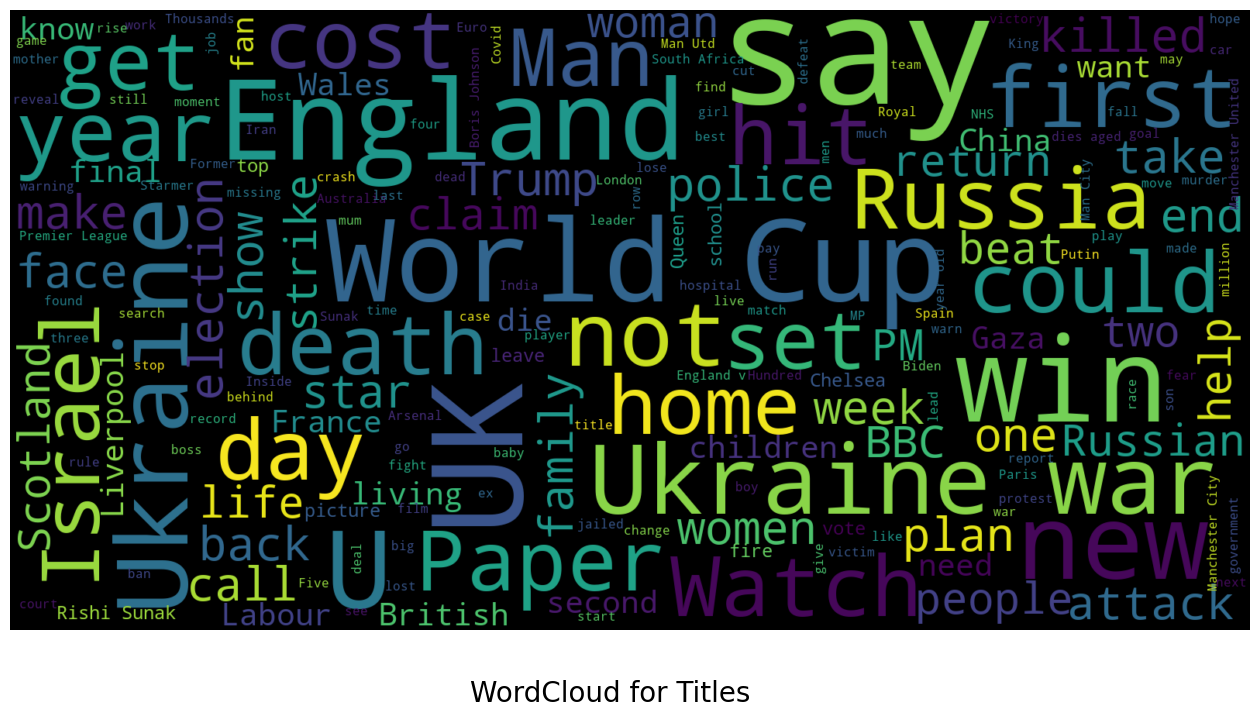

In [11]:
show_wordcloud(df['title'], title = 'WordCloud for Titles', mask = None)

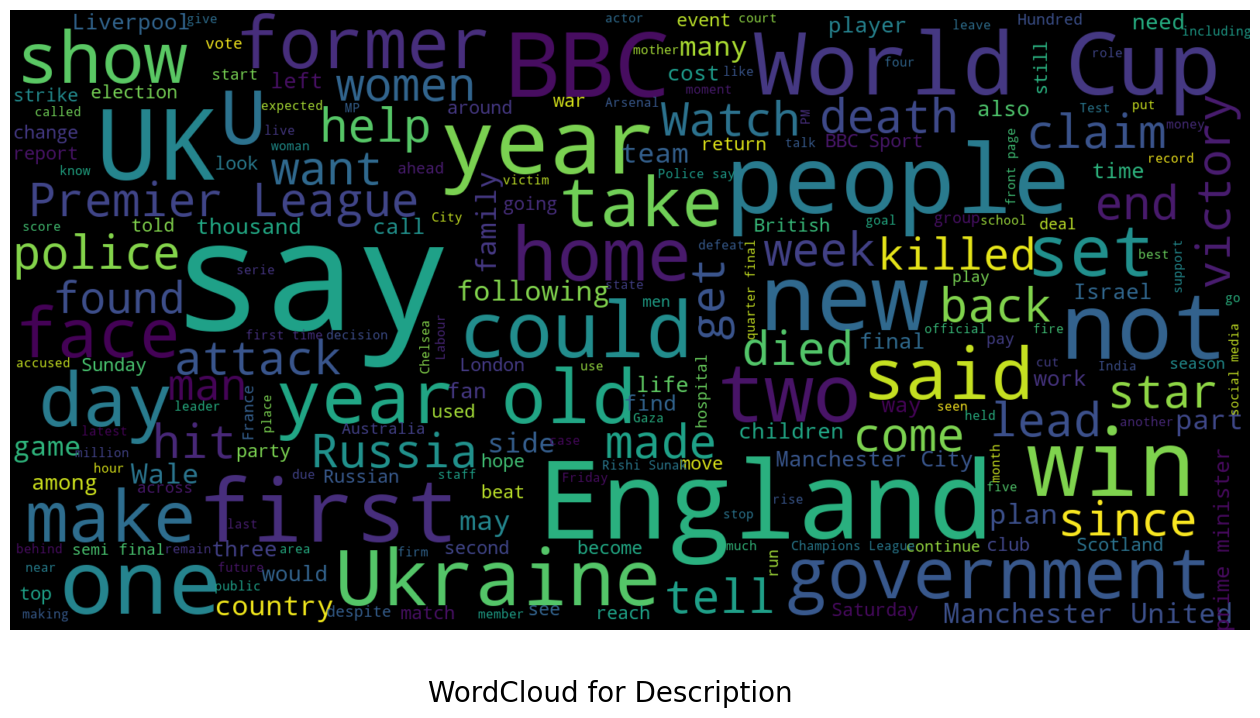

In [12]:
show_wordcloud(df['description'], title = 'WordCloud for Description', mask = None)

# Histograms for article length distributions and publication times.

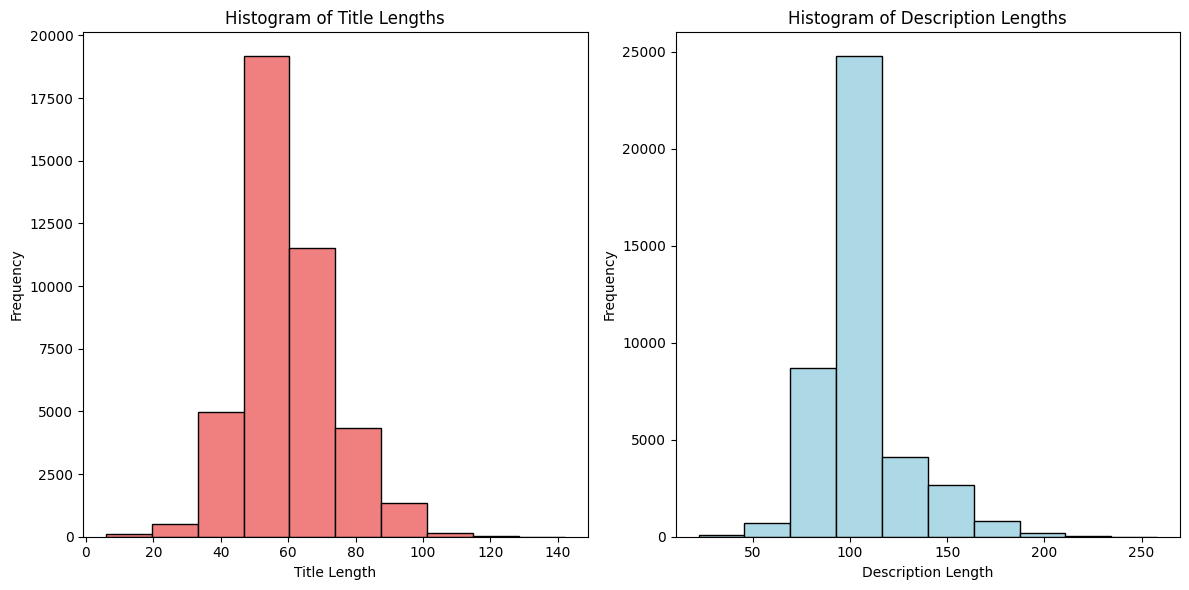

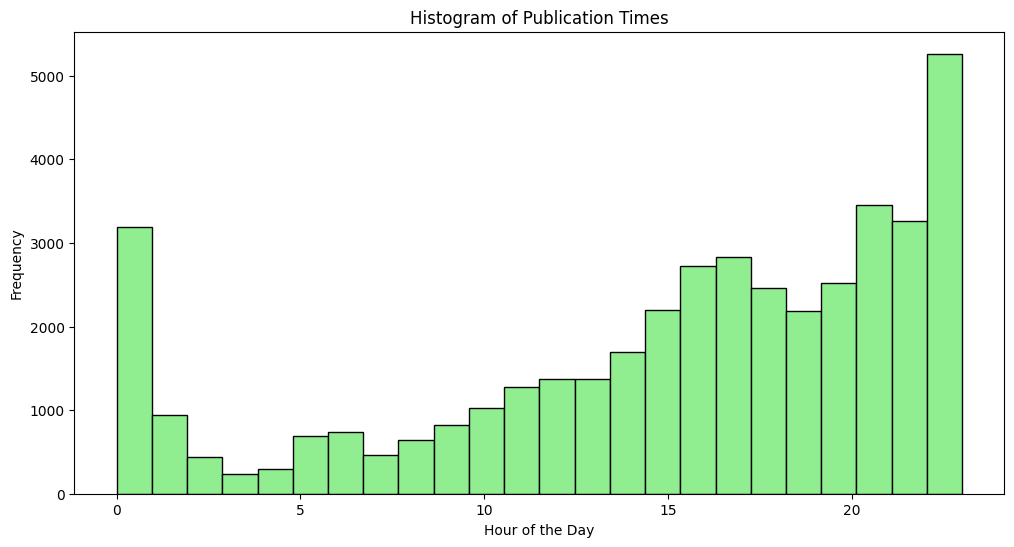

In [13]:
# Calculate lengths
df['title_length'] = df['title'].apply(len)
df['description_length'] = df['description'].apply(len)

# Extract date and time from pubDate
df['pubDate'] = pd.to_datetime(df['pubDate'], format='%a, %d %b %Y %H:%M:%S GMT')
df['hour'] = df['pubDate'].dt.hour

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['title_length'], bins=10, color='lightcoral', edgecolor='black')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Histogram of Title Lengths')

plt.subplot(1, 2, 2)
plt.hist(df['description_length'], bins=10, color='lightblue', edgecolor='black')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.title('Histogram of Description Lengths')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(df['hour'], bins=24, color='lightgreen', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Histogram of Publication Times')
plt.show()


# Data Preprocessing

## Cleaning the Text: Remove special characters, HTML tags (if any), and unnecessary whitespaces. Convert all text to lowercase to ensure consistency.
## Tokenization: Split the text into individual words or tokens, which will make it easier to analyze.
## Stopwords Removal: Remove common stopwords like "the," "is," "in," etc., as they do not carry significant meaning.
## Stemming/Lemmatization: Optionally, reduce words to their root form (e.g., "running" to "run") using stemming or lemmatization.

In [14]:
#Summary of the original dataset
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 42115  │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column                   ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25   ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ title_length             │    0 │      0 │   59.22 │   13.43 │   6 │    50 │   57 │   67 │   142 │   ▅▇▂   │  │
│ │ description_length       │    0 │      0 │   104.3 │   21.72 │  22 │    93 │   99 │  108 │   258 │   ▇▅▁   │  │
│ │ hour                     │    0 │      0 │   15.11 │   7.038 │   0 │    11 │   17 │   21 │    23 │ ▃▁▂▃▆▇  │  │
│ └──────────────────────────┴──────┴────────┴─────────┴─────────┴─────┴───────┴──────┴──────┴───────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓  │
│ ┃ column      ┃ NA   ┃ NA %    ┃ first                        ┃ last                         ┃ frequency     ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩  │
│ │ pubDate     │    0 │       0 │     2013-08-30 01:01:55      │     2024-12-04 00:05:52      │ None          │  │
│ └─────────────┴──────┴─────────┴──────────────────────────────┴──────────────────────────────┴───────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ title     │  0 │    0 │ Mbappé    │ Commonwea │  A really │ ‘You      │      59.2 │       9.7 │     407281 │  │
│ │           │    │      │           │ lth       │ simple    │ aimed     │           │           │            │  │
│ │           │    │      │           │ Games:    │ guide     │ your guns │           │           │            │  │
│ │           │    │      │           │ Matty Lee │           │ at my     │           │           │            │  │
│ │           │    │      │           │ & Noah    │           │ eyes but  │           │           │            │  │
│ │           │    │      │           │ Williams  │           │ my heart  │           │           │            │  │
│ │           │    │      │           │ win       │     

In [15]:

dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,title[object],1. Election poll tracker: How do 2. Ukraine war in maps: Tracking 3. Newscast4. What is the UK inflation rate 5. What is a recession and how co6. How many Ukrainians have fled 7. Download now8. UK inflation rate calculator: 9. Hamas hostages: Who are the pe10. How fast are prices rising in 11. other,"34 (0.1%)32 (0.1%)30 (0.1%)26 (0.1%)18 (0.0%)18 (0.0%)17 (0.0%)17 (0.0%)16 (0.0%)15 (0.0%)41,892 (99.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAzhJREFUeJzt3LFtIlEYRtH3LOTFCcgaiRJ2e6AIp+6YItyEBYG9S8KKwC1cJDgnczQTXPmXpfk8L5fLgMJT8hQQGyWxkREbGbGRERsZsZERGxmxkREbmac5558557p7JI/8m+33GOPXrV+E++eMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERtpbB9jjH/dI3lU038xouKMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbGuoqMdRUZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkxEbGuoqMdRUZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKZo4xXsYYz90jeVDn1bIsb5vN5vXWb8J9O51On6traPv9/nu73f699Qtxn47H4/pwOLyurj9cQ9vtdl+3finu2os/EMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Misfj4B6R7Jo/npay7L8u7jSYqPJ30WTuVsXUXGHwhkxEZGbGTERkZsZMRGRmxkxEZGbIzKf0WpV2xeyLPPAAAAAElFTkSuQmCC"">",0(0.0%)
2,pubDate[datetime64[ns]],"Min: 2013-08-30Max: 2024-12-04Duration: 4,113 days",40189 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAQZJREFUeJzt3LEJAzEQAMG3cXuuSagmF6iv4BOBF7+ZSYW4ZLlAgR5rrQMKz2QKiI2S2Mi8ulHcyZzzvXNvjPG5OrPZyIiNjNjIiI2M2MiIjYzYyHhn+3Nz873sG2w2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiPjm9ObmD/0Xekum42M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNo3ICU0QLPYvw9HwAAAAASUVORK5CYII="">",0(0.0%)
3,guid[object],1. https://www.bbc.co.uk/news/bus2. https://www.bbc.co.uk/news/bus3. https://www.bbc.co.uk/news/wor4. https://www.bbc.co.uk/news/bus5. https://www.bbc.co.uk/news/uk-6. https://www.bbc.co.uk/news/bus7. https://www.bbc.co.uk/news/wor8. https://www.bbc.co.uk/news/bus9. https://www.bbc.co.uk/news/wor10. https://www.bbc.co.uk/news/uk-11. other,"63 (0.1%)52 (0.1%)47 (0.1%)36 (0.1%)35 (0.1%)34 (0.1%)33 (0.1%)32 (0.1%)23 (0.1%)21 (0.0%)41,739 (99.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAzhJREFUeJzt3LFtIlEYRtH3LOTFCcgaiRJ2e6AIp+6YItyEBYG9S8KKwC1cJDgnczQTXPmXpfk8L5fLgMJT8hQQGyWxkREbGbGRERsZsZERGxmxkREbmac5558557p7JI/8m+33GOPXrV+E++eMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERtpbB9jjH/dI3lU038xouKMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbGuoqMdRUZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkxEbGuoqMdRUZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNj

In [16]:
def clean_text(df, columns_to_clean=['title', 'description']):
    """
    Cleans the text in the specified columns of a DataFrame by performing:
    1. Lowercasing
    2. Removing non-alphabetic characters
    3. Removing stopwords (except 'not')
    4. Applying stemming

    Parameters:
    news_df (pd.DataFrame): The DataFrame containing the text data.
    columns_to_clean (list): List of column names to clean.

    Returns:
    cleaned_data (dict): A dictionary containing the cleaned text for each specified column.
    """
   
    
    # Initialize a dictionary to store the cleaned text
    cleaned_data = {col: [] for col in columns_to_clean}

    # Initialize the Porter Stemmer
    ps = PorterStemmer()

    # Load stopwords and remove 'not' to preserve negations in sentiment analysis
    all_stopwords = set(stopwords.words('english'))
    all_stopwords.remove('not')

    # Iterate through each row in the DataFrame
    for i in range(len(df)):
        for col in columns_to_clean:
            # Step 1: Remove non-alphabetical characters and convert to lowercase
            text = re.sub(r'[^a-zA-Z]', ' ', df[col][i])
            text = text.lower()

            # Step 2: Tokenize (split the text into individual words)
            tokens = text.split()
            
            # 3 . Remove URLs
            text = re.sub(r'http\S+', '', text)
    
            # 4. Remove numbers
            text = re.sub(r'\d+', '', text)

            # 5. Remove punctuation
            text = text.translate(str.maketrans('', '', string.punctuation))
 
            # Step 3: Remove stopwords and apply stemming
            cleaned_tokens = [ps.stem(word) for word in tokens if word not in all_stopwords]

            # Step 4: Join the cleaned tokens back into a single string
            cleaned_text = ' '.join(cleaned_tokens)

            # Append the cleaned text to the respective column in the dictionary
            cleaned_data[col].append(cleaned_text)

    # Return the dictionary with cleaned text data
    return cleaned_data

In [17]:
cleaned_data = clean_text(df)


## This function randomly selects a random row from the DataFrame, then prints both the original and the cleaned version of the text.

In [18]:
def show_random_sample(df, cleaned_data):
    """
    Displays a random sample of the text before and after cleaning.

    Parameters:
    news_df (pd.DataFrame): The original DataFrame with the text data.
    cleaned_data (dict): The cleaned text data.
    """
    # Choose a random index
    random_idx = random.randint(0, len(df) - 1)

    # Display original and cleaned text
    print(f"Original Title: {df['title'][random_idx]}")
    print(f"Cleaned Title: {cleaned_data['title'][random_idx]}\n")
    print(f"Original Description: {df['description'][random_idx]}")
    print(f"Cleaned Description: {cleaned_data['description'][random_idx]}")

# Example usage:
show_random_sample(df, cleaned_data)

Original Title: Covid: Millions invited for booster jabs from Monday
Cleaned Title: covid million invit booster jab monday

Original Description: Health bosses predict a resurgence of the virus and flu during the autumn and winter.
Cleaned Description: health boss predict resurg viru flu autumn winter


In [19]:
df['title'] = cleaned_data['title']
df['description'] = cleaned_data['description']

In [37]:
df.head()


,title,description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,label,vader_prediction,sentiment_title_score,sentiment_description_score,sentiment_title,sentiment_description
1,Murdered driver's family demand help for couriers,Mark Lang was killed by a man who was stealing...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,Negative,-0.4939,-0.8481,Negative,Negative
15,Teen who killed Holly Newton named for first t...,Holly Newton's murderer is named for the first...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,Negative,-0.6705,-0.6808,Negative,Negative
29,'Life without Covid rules is much worse than w...,Vaccines and treatments have helped many in th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,Negative,-0.4767,-0.3919,Negative,Negative
30,US approves postpartum depression pill,Clinical trials showed the drug helped to redu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,Negative,-0.2500,-0.3818,Negative,Negative
37,Taylor Swift tour: Excruciating to watch Ticke...,The US pop star says she had been told Ticketm...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,Positive,-0.8020,0.3607,Negative,Positive


# Sentiment Analysis Model

## VADER (Valence Aware Dictionary and sEntiment Reasoner)¶

### Best For: Social media posts, news headlines, or short text.
### Why: VADER is a rule-based model that is specifically tuned for social media and news content. It can handle negations and emoticons effectively. It works well on shorter texts like headlines, which are often found in news data.
### Pros: Easy to implement, fast, and interpretable.
### Cons: Limited to short texts; less accurate on complex language and sarcasm.

In [22]:
# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis on 'title' and 'description' columns
df['sentiment_title_score'] = df['title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['sentiment_description_score'] = df['description'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Function to classify sentiment based on compound score
def classify_sentiment(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification function to both title and description sentiment scores
df['sentiment_title'] = df['sentiment_title_score'].apply(classify_sentiment)
df['sentiment_description'] = df['sentiment_description_score'].apply(classify_sentiment)

### Accuracy...




In [23]:
# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to get predictions
def classify_sentiment(text):
    score = analyzer.polarity_scores(str(text))['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_prediction'] = df['description'].apply(classify_sentiment)

# Remove empty labels
df = df[df['label'].notna() & (df['label'] != '')]

# Normalize both columns to title case (e.g., 'Positive')
df['label'] = df['label'].str.strip().str.title()
df['vader_prediction'] = df['vader_prediction'].str.strip().str.title()

# Evaluate
print(classification_report(df['label'], df['vader_prediction']))


              precision    recall  f1-score   support

    Negative       0.60      1.00      0.75         3
     Neutral       0.00      0.00      0.00         2
    Positive       0.00      0.00      0.00         1

    accuracy                           0.50         6
   macro avg       0.20      0.33      0.25         6
weighted avg       0.30      0.50      0.38         6



In [25]:
# Count the number of each sentiment type for titles and descriptions
title_sentiment_distribution = df['sentiment_title'].value_counts()
description_sentiment_distribution = df['sentiment_description'].value_counts()

print("Title Sentiment Distribution:")
print(title_sentiment_distribution)

print("\nDescription Sentiment Distribution:")
print(description_sentiment_distribution)

Title Sentiment Distribution:
sentiment_title
Negative    6
Name: count, dtype: int64

Description Sentiment Distribution:
sentiment_description
Negative    5
Positive    1
Name: count, dtype: int64


## Visualize Sentimients

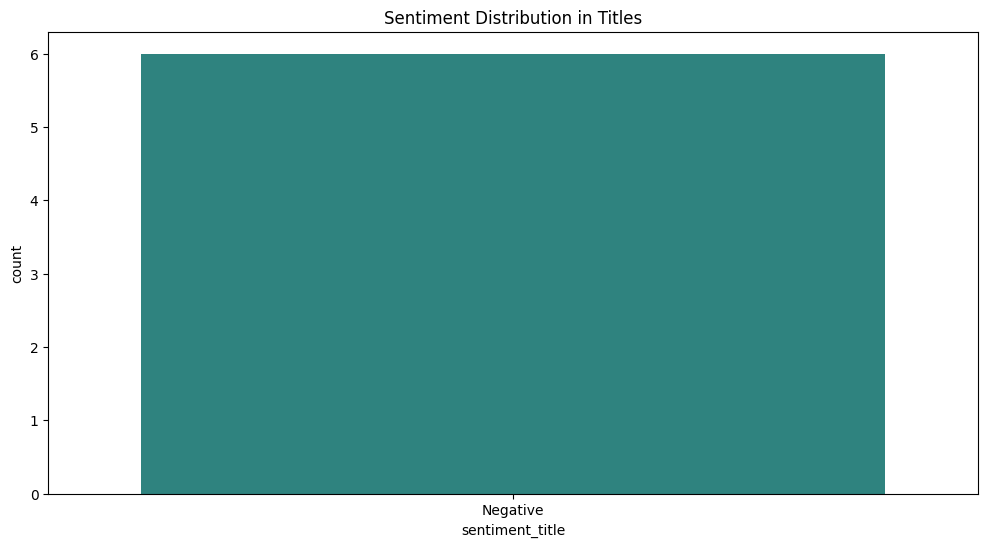

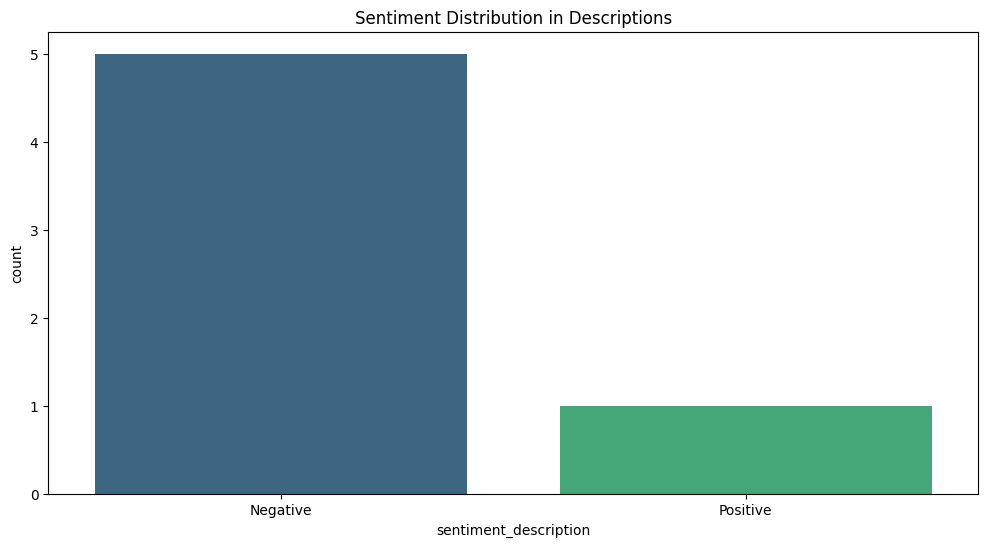

In [26]:
# Plot sentiment distribution for titles
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment_title', data= df, palette='viridis')
plt.title('Sentiment Distribution in Titles')
plt.show();

# Plot sentiment distribution for descriptions
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment_description', data=df, palette='viridis')
plt.title('Sentiment Distribution in Descriptions')
plt.show();

## Perform Correction analysis

In [27]:
# Compute correlation between title and description sentiments
correlation = df[['sentiment_title_score', 'sentiment_description_score']].corr().iloc[0, 1]
print(f"Correlation between title and description sentiments: {correlation:.2f}")

Correlation between title and description sentiments: -0.40


In [28]:


# # Sample 20 random rows from your dataset
# sample_df = df[['title']].dropna().sample(20, random_state=1).copy()
# sample_df['true_sentiment'] = ''  # Add empty column for manual labels

# # Display for manual labeling
# for i, row in sample_df.iterrows():
#     print(f"\n{i}. {row['title']}")
#     label = input("Label sentiment (positive/negative/neutral): ").strip().lower()
#     while label not in ['positive', 'negative', 'neutral']:
#         label = input("Please enter a valid label (positive/negative/neutral): ").strip().lower()
#     sample_df.at[i, 'true_sentiment'] = label

# # Save for reuse
# # sample_df.to_csv("labeled_sentiment_sample.csv", index=False)
# # print("\nDone! Labeled data saved to 'labeled_sentiment_sample.csv'")




# Drop rows with missing titles
title_df = df[['title']].dropna()

# Get number of available rows
n_available = len(title_df)
n_sample = min(20, n_available)  # take min to avoid sampling more than available

# Sample safely
sample_df = title_df.sample(n_sample, random_state=1).copy()
sample_df['true_sentiment'] = ''  # Add empty column for manual labels

# Display for manual labeling
for i, row in sample_df.iterrows():
    print(f"\n{i}. {row['title']}")
    label = input("Label sentiment (positive/negative/neutral): ").strip().lower()
    while label not in ['positive', 'negative', 'neutral']:
        label = input("Please enter a valid label (positive/negative/neutral): ").strip().lower()
    sample_df.at[i, 'true_sentiment'] = label

# Save for reuse
# sample_df.to_csv("labeled_sentiment_sample.csv", index=False)
# print("\nDone! Labeled data saved to 'labeled_sentiment_sample.csv'")



29. 'Life without Covid rules is much worse than we thought'


Label sentiment (positive/negative/neutral):  Hey i am happy...
Please enter a valid label (positive/negative/neutral):  positive



15. Teen who killed Holly Newton named for first time as ex-boyfriend


Label sentiment (positive/negative/neutral):  negative



37. Taylor Swift tour: Excruciating to watch Ticketmaster ticket chaos, says pop star


Label sentiment (positive/negative/neutral):  neutral



1. Murdered driver's family demand help for couriers


Label sentiment (positive/negative/neutral):  negative



30. US approves postpartum depression pill


Label sentiment (positive/negative/neutral):  neutral



40. Murder arrest after girl found in Kingsley pond dies


Label sentiment (positive/negative/neutral):  negative


## Explore sentiments over time

In [35]:
# Save the DataFrame with sentiment analysis results
df.to_csv('news_sentiment_analysis.csv', index=False)

## Analyzed the sentiment distribution across the dataset and found the following breakdown:

#### Sentiment in Titles: Neutral (16,023), Negative (13,075), Positive (8,575)
#### Sentiment in Descriptions: Neutral (13,595), Negative (12,529), Positive (11,549)

### Correlation and Temporal Analysis¶
Further,  performed a correlation analysis between the sentiment scores of the title and description columns. The correlation coefficient of 0.46 suggests a moderate positive relationship between the two.

#### plotted sentiment scores over time, revealing key sentiment trends throughout the dataset:

#### In January 2022, the sentiment was predominantly positive.
Between June 2022 and February 2023, sentiment hovered around neutral.
From April 2023 onwards, sentiment tended to be more negative.
Overall, sentiment scores in BBC News articles from 2022 to 2024 trended below neutral, with some fluctuations.

### This project provided insights into the evolving sentiment in BBC News articles over time.